In [1]:
import numpy as np

# Import and visualize data
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/home/quazar/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


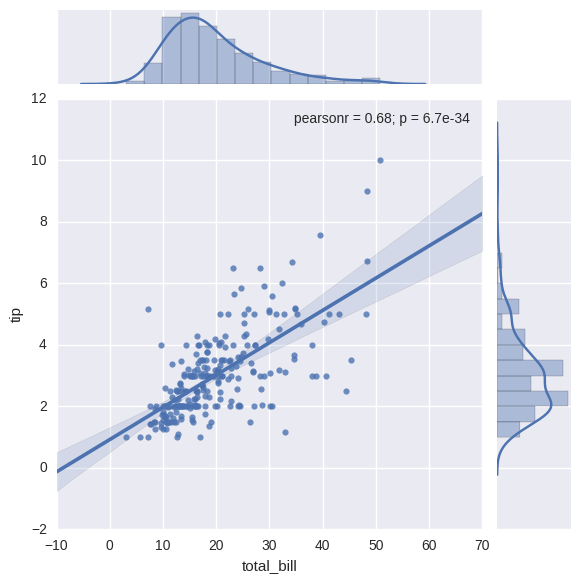

In [3]:
sns.jointplot('total_bill', 'tip', data = tips, kind = 'reg')

Linear regression analytic solution

In [4]:
def regression(x, y):
    # y = ax + b
    # Find parameters (a, b)
    a = ( (np.mean(x) * np.mean(y)) - (np.mean(x * y)) ) / ( np.square(np.mean(x)) - np.mean(np.square(x)) )
    b = np.mean(y) - ( a * np.mean(x) )
    
    # Plot regression line
    x_min = np.min(x)
    x_max = np.max(x)
    y1 = (a * x_min)+ b
    y2 = (a * x_max)  + b
    plt.plot([x_min, x_max], [y1, y2], c = 'r')
    
    # Plot data
    plt.scatter(x, y)
    
    # Squared error
    error = np.sum([np.square((a * xi - b) - yi) for xi, yi in zip(x, y)])
    return a, b, error

a: 0.10502451738435356 | b: 0.9202696135546695 | error : 1079.3593976036675


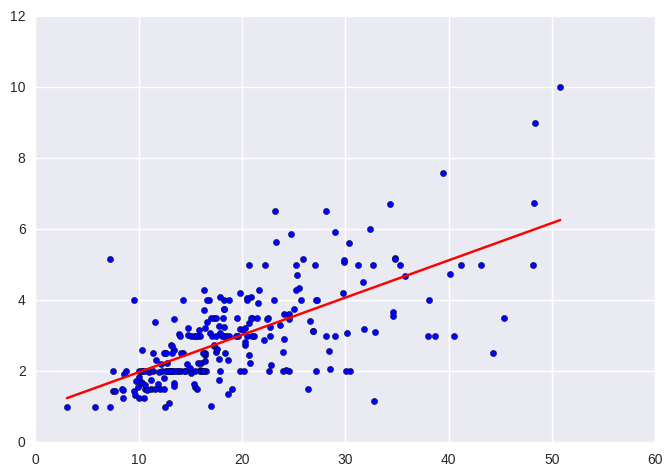

In [5]:
a, b, error = regression(tips['total_bill'], tips['tip'])
print('a: {0} | b: {1} | error : {2}'.format(a, b, error))

Gradient descent

In [17]:
class LinearReg:
    '''
    Performs linear regression using gradient descent
    y = a * x + b
    
    Args:
        learning_rate: Step to take when performing gradient descent
        a: Function parameter
        b: Funcion constant
    '''
    def __init__(self, learning_rate, initial_a=0, initial_b=0):
        self.learning_rate = learning_rate
        self.a = initial_a
        self.b = initial_b        
    
    def predict(self, x):
        return self.a * x + self.b
    
    def fit(self, x, y, num_iters, render_interval=0):
        '''
        Fits data points to a line
        
        Args:
            x: x values to fit
            y: y values to fit
            num_iters: Number of iterations to fit
            render_interval: Render current fit every N steps, 
                             0 for no rendering
        '''
        if render_interval > 0:
            plt.scatter(x, y)
            plt.xlabel('X data')
            plt.ylabel('Y data')
        for i_step in range(num_iters):
            # Calculate predictions
            pred = self.predict(x)
            loss = 0.5 * np.mean(np.square(y - pred))
            # Calculate gradients
            a_grad = np.mean((-x) * (y - pred))
            b_grad = np.mean(-(y - pred))
            # Adjust a, b
            self.a = self.a - self.learning_rate * a_grad
            self.b = self.b - self.learning_rate * b_grad
            # Display information
            if i_step % render_interval == 0:
                print('[Loss: {}][a: {}][b: {}]'.format(loss, self.a, self.b))
                if render_interval > 0:
                    plt.plot(x, pred, '--')
        if render_interval > 0:
            plt.plot(x, pred, 'k')

[Loss: 5.448141803278689][a: 0.06761315901639345][b: 0.0029982786885245903]
[Loss: 1.9468811003047348][a: 0.10336097609699882][b: 0.004655769013505844]
[Loss: 0.9679721633584107][a: 0.1222598083032876][b: 0.005604297590509517]
[Loss: 0.6942692241430485][a: 0.13224964200466993][b: 0.006177946429261784]
[Loss: 0.6177297084527675][a: 0.13752879129874881][b: 0.006553363342746927]


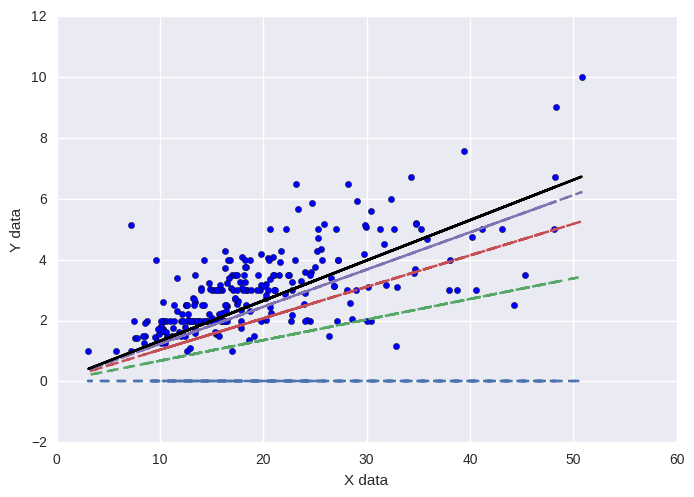

In [18]:
reg = LinearReg(learning_rate=0.001)
reg.fit(tips['total_bill'], tips['tip'], 5, render_interval=1)